<a href="https://colab.research.google.com/github/ElenaBara21/Portfolio/blob/main/Amazon_helium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from pandas.api.types import CategoricalDtype
# Amazon
The most common types of collagen used in supplements are:
Type I
Type II
Type III
Type V
Type X
These collagen types come in three different forms: Hydrolyzed collagen (collagen peptides, collagen powder, collagen hydrolysate and hydrolyzed gelatin), gelatin and undenatured type II collagen (UC-II).
Collagen supplement ingredients come from a variety of sources. Bovine collagen made from cows contains types I & III. Marine collagen made from fish contains type I & II. Poultry collagen made from chickens contains type II and eggshell membrane collagen contains types I & V.
We are interested in Type II, collagen is found in both marine and chicken products. People with allergies to fish or chicken should consult their doctor before taking supplements containing type II collagen.
## Data Description
* **Product**
* **brand**
* **Price_AED**
* **Sales**- quantity sold
* **Revenue** - quantity_sold x price_aed
* **BSR** - BSR – Best Seller Rank.Amazon tracks and publicizes its best-selling products to drive sales. Every product sold on Amazon is ranked by Amazon in at least one category, and often in several sub-categories. Ranking affects where and when products appear in a customer’s organic search. Most sellers try to rank high enough to be on the first results page of a customer search.
* **Fees_AED**- FBA fee+ referral fee
* **Active_Seller** - number of active sellers
* **Ratings** - amazon sale rating
* **Review_Count**- total number of reviews
* **Images**-
* **Review_velocity**-change in review count in the last 30 days
* **Buy_Box**- buy box owner,Each product page has a ‘Buy Now’ button on the right side, adjacent to the product image and description, with a hierarchal list of other buyers listed below. Sometimes, this coveted spot is based on past sales history, and sometimes it’s rotated between sellers.Amazon decides who earns the Buy Box position, but using Helium 10 tools to more effectively increase visibility and sales can help a merchant gain the buy box position. If you sell unique products under a private label, you are the most likely to have the buy box because no one else is selling the same product.
* **Category**
* **Size_tier**-это категория, в которую попадает товар на Amazon в зависимости от его размера и веса: Large Envelope, Standard Envelope, Standard Parcel
* **Fullfilment** - AMZ=FBA FBA stands for Fulfillment by Amazon. It is a program offered by Amazon that allows sellers to store their products in Amazon's fulfillment centers. 

MFN stands for Merchant Fulfilled Network. It refers to a method of fulfilling orders on Amazon where the seller handles the entire fulfillment process themselves. In this case, the seller stores the products in their own facilities and is responsible for packaging, shipping, and customer service.
* **Dimensions**
* **Weight**
* **Creation_Date**

***Buy Box (англ. Buy Box) - это блок на странице товара на Amazon, в котором покупатель может нажать на кнопку "Купить сейчас" и сделать покупку у конкретного продавца. Он находится в правой части страницы товара, рядом с ценой и другими деталями товара. В Buy Box отображается один продавец, но Amazon может показывать разных продавцов на этом месте, основываясь на различных факторах, таких как цена, рейтинг продавца, наличие товара, и другие. Обладание Buy Box очень важно для продавцов, так как это позволяет им получать больше продаж на Amazon.



In [151]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library
import seaborn as sns
import pandas as pd
import numpy as np


In [152]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [153]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [154]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [155]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [156]:
df = pd.read_csv('Helium_10_Xray_2023-05-08.csv')

In [157]:
df1=df.copy()

In [158]:
# Rename columns to lowercase with underscores instead of whitespace
new_columns = {col: col.lower().replace(' ', '_') for col in df1.columns}
df1 = df1.rename(columns=new_columns)


### Understand the shape of the dataset


In [159]:
df1.shape

(55, 22)

* 55 rows and 18 columns

In [160]:
df1.head()

,product_details,asin,url,image_url,brand,price_aed,sales,revenue,bsr,fees_aed,...,review_count,images,review_velocity,buy_box,category,size_tier,fulfillment,dimensions,weight,creation_date
0,"($) Nutrili Marine Collagen Shots (20) | Hair,...",B09YD7RHC2,https://www.amazon.ae/dp/B09YD7RHC2?psc=1,https://m.media-amazon.com/images/I/61asHjsoyP...,Nutrili,295.00,88.0,"25,960.00",811,52.75,...,26,11,4,nutrili,Health,Standard Parcel,FBA,4.4x3.4x4.6,1.72,4/20/2022
1,($) Swisse Beauty Collagen Glow Powder with 25...,B08NDYTG3D,https://www.amazon.ae/dp/B08NDYTG3D?psc=1,https://m.media-amazon.com/images/I/71VnTFRUH4...,Swisse,144.00,5.0,720,"23,351",29.60,...,9,3,0,Pattern MENA,Health,Standard Parcel,FBA,2.8x2.7x4.9,0.37,NaN
2,($) Snaktive Collagen Chocolate - 6x40g bars,B0B9SWK8XQ,https://www.amazon.ae/dp/B0B9SWK8XQ?psc=1,https://m.media-amazon.com/images/I/61Id91ioPE...,SNAKTIVE,60.00,4.0,240,"26,620",16.50,...,2,4,0,Le Chocolat LLC,Health,Large Envelope,FBA,1.8x5.1x2.8,0.55,NaN
3,"Youtheory Collagen Advanced with Vitamin C, 12...",B006VAZYLS,https://www.amazon.ae/dp/B006VAZYLS?psc=1,https://m.media-amazon.com/images/I/71m5dU+vK4...,Youtheory,60.37,89.0,"5,372.93",753,17.00,...,"4,676",9,88,NBL General Trading L.L.C,Health,Standard Parcel,FBA,3.1x3.0x3.6,0.42,NaN
4,Neocell Super Collagen PlUS C - 250 Tablets,B00028NGEC,https://www.amazon.ae/dp/B00028NGEC?psc=1,https://m.media-amazon.com/images/I/71TDUkdGRZ...,Neocell,135.00,542.0,"73,170.00",200,28.25,...,"18,342",14,140,Amazon,Health,Standard Parcel,AMZ,3.1x2.8x5.3,0.66,03/06/2019


In [161]:
df.tail()

,Product Details,ASIN,URL,Image URL,Brand,Price AED,Sales,Revenue,BSR,Fees AED,...,Review Count,Images,Review velocity,Buy Box,Category,Size Tier,Fulfillment,Dimensions,Weight,Creation Date
50,Lilfull Hair Skin and Nails Vitamins | 150 Sof...,B0B34TSLWJ,https://www.amazon.ae/dp/B0B34TSLWJ?psc=1,https://m.media-amazon.com/images/I/61aMB-cOCK...,Lilfull,85.00,NaN,NaN,"3,047",20.75,...,31,3,14,Lilfull,Health,Standard Parcel,FBA,2.7x2.6x5.3,0.53,6/29/2022
51,GOLD COLLAGEN® Pure 10 Day - Fight Early Signs...,B00940HI48,https://www.amazon.ae/dp/B00940HI48?psc=1,https://m.media-amazon.com/images/I/51UhIzJ0uM...,GOLD COLLAGEN,330.00,7.0,"2,310.00","24,836",59.94,...,121,5,0,BalsamPh,Health,Standard Parcel,MFN,7.7x3.5x10.2,3.02,NaN
52,($) Collagen Beauty Effervescent No Sugar Tabl...,B09LSHR924,https://www.amazon.ae/dp/B09LSHR924?psc=1,https://m.media-amazon.com/images/I/515RFiVjxF...,Activlab,85.00,NaN,NaN,"33,064",20.25,...,3,3,0,PAXAS Pharmaceuticals,Health,Large Envelope,FBA,1.6x1.5x6.2,0.22,11/13/2021
53,($) Collagen Beauty Hair | 200g jar | Rebuildi...,B09STVP1Z3,https://www.amazon.ae/dp/B09STVP1Z3?psc=1,https://m.media-amazon.com/images/I/71ZKcMadDB...,Paxas,231.32,1.0,231.32,"57,439",42.70,...,1,8,0,PAXAS Pharmaceuticals,Health,Standard Parcel,MFN,3.9x3.9x3.9,0.57,2/18/2022
54,($) Collagen Beauty Shots I 960ml I 12 Shots I...,B09YRK3456,https://www.amazon.ae/dp/B09YRK3456?psc=1,https://m.media-amazon.com/images/I/71G-zpFfyg...,Paxas,231.00,1.0,231,"11,077",43.65,...,3,3,0,PAXAS Pharmaceuticals,Health,Standard Parcel,FBA,4.8x4.3x5.9,2.69,4/25/2022


**Lets see our dataset**

In [162]:
df1.image_url.nunique()

53

In [163]:
df1.url.nunique()

53

In [164]:
df1.asin.nunique()

53

In [165]:
df1 = df1.drop(["image_url"], axis=1)

In [166]:
df1 = df1.drop(["url"], axis=1)

In [167]:
df1 = df1.drop(["asin"], axis=1)

In [168]:
df1 = df1.drop(["category"], axis=1)

In [169]:
# Assuming the dataframe is named df1 and the column is named 'Sales'
df1['sales'] = df1['sales'].replace('n/a', np.nan)

Мы удалили колонки url, asin, category, image_url потому что они сне представляют интереса

In [170]:
df1['revenue'] = df1['revenue'].str.replace(',', '').astype(float)

In [171]:
df1['bsr'] = df1['bsr'].str.replace(',', '').astype(float)

In [172]:
df1['review_count'] = df1['review_count'].str.replace(',', '').astype(float)

In [173]:
df1['creation_date'] = pd.to_datetime(df1['creation_date'], format='%m/%d/%Y')


In [174]:
df1['creation_date'] = pd.to_datetime(df1['creation_date'], format='%m/%d/%Y', errors='coerce')



** В данном файле 4 колонки из-за запятых неправильно отображались данные некоторый колонок, исправлено

In [175]:
df1.head()

,product_details,brand,price_aed,sales,revenue,bsr,fees_aed,active_sellers_#,ratings,review_count,images,review_velocity,buy_box,size_tier,fulfillment,dimensions,weight,creation_date
0,"($) Nutrili Marine Collagen Shots (20) | Hair,...",Nutrili,295.00,88.0,25960.00,811.0,52.75,1,4.6,26.0,11,4,nutrili,Standard Parcel,FBA,4.4x3.4x4.6,1.72,2022-04-20
1,($) Swisse Beauty Collagen Glow Powder with 25...,Swisse,144.00,5.0,720.00,23351.0,29.60,1,4.9,9.0,3,0,Pattern MENA,Standard Parcel,FBA,2.8x2.7x4.9,0.37,NaT
2,($) Snaktive Collagen Chocolate - 6x40g bars,SNAKTIVE,60.00,4.0,240.00,26620.0,16.50,1,5.0,2.0,4,0,Le Chocolat LLC,Large Envelope,FBA,1.8x5.1x2.8,0.55,NaT
3,"Youtheory Collagen Advanced with Vitamin C, 12...",Youtheory,60.37,89.0,5372.93,753.0,17.00,8,4.5,4676.0,9,88,NBL General Trading L.L.C,Standard Parcel,FBA,3.1x3.0x3.6,0.42,NaT
4,Neocell Super Collagen PlUS C - 250 Tablets,Neocell,135.00,542.0,73170.00,200.0,28.25,2,4.4,18342.0,14,140,Amazon,Standard Parcel,AMZ,3.1x2.8x5.3,0.66,2019-03-06


## Creation date


In [176]:
df1['creation_date'].nunique

<bound method IndexOpsMixin.nunique of 0    2022-04-20
1           NaT
2           NaT
3           NaT
4    2019-03-06
5    2019-06-11
6    2022-07-28
7    2020-03-22
8           NaT
9    2019-01-17
10   2019-01-17
11   2020-03-09
12   2019-01-30
13   2020-04-14
14   2022-04-20
15   2019-09-23
16   2019-01-17
17   2020-09-21
18   2019-05-25
19   2019-06-26
20   2022-06-29
21   2019-02-06
22   2022-01-03
23   2019-05-30
24   2019-09-24
25   2019-01-17
26   2019-01-17
27   2020-02-04
28   2020-05-13
29   2022-02-23
30   2022-01-03
31   2019-02-06
32   2019-01-06
33   2019-01-17
34   2019-10-09
35   2022-12-28
36          NaT
37   2017-12-25
38   2019-01-17
39   2022-08-14
40          NaT
41   2019-01-17
42   2019-01-17
43   2021-10-13
44          NaT
45   2019-01-17
46   2019-01-17
47   2019-03-06
48   2020-10-07
49   2021-12-26
50   2022-06-29
51          NaT
52   2021-11-13
53   2022-02-18
54   2022-04-25
Name: creation_date, dtype: datetime64[ns]>

In [177]:
df1['creation_date'] = pd.to_datetime(df1['creation_date'], format='%m/%d/%Y', errors='coerce')


*we will drop missing values


In [178]:
df1 = df1.dropna(subset=['creation_date'])


In [179]:
df1['creation_date'].nunique

<bound method IndexOpsMixin.nunique of 0    2022-04-20
4    2019-03-06
5    2019-06-11
6    2022-07-28
7    2020-03-22
9    2019-01-17
10   2019-01-17
11   2020-03-09
12   2019-01-30
13   2020-04-14
14   2022-04-20
15   2019-09-23
16   2019-01-17
17   2020-09-21
18   2019-05-25
19   2019-06-26
20   2022-06-29
21   2019-02-06
22   2022-01-03
23   2019-05-30
24   2019-09-24
25   2019-01-17
26   2019-01-17
27   2020-02-04
28   2020-05-13
29   2022-02-23
30   2022-01-03
31   2019-02-06
32   2019-01-06
33   2019-01-17
34   2019-10-09
35   2022-12-28
37   2017-12-25
38   2019-01-17
39   2022-08-14
41   2019-01-17
42   2019-01-17
43   2021-10-13
45   2019-01-17
46   2019-01-17
47   2019-03-06
48   2020-10-07
49   2021-12-26
50   2022-06-29
52   2021-11-13
53   2022-02-18
54   2022-04-25
Name: creation_date, dtype: datetime64[ns]>

In [180]:
## ToREMOVE !!!Creation Date
# sns.countplot(data=df1, x='creation_date')
# plt.xticks(rotation=90);


## Sales

replace n/a to NaN to avoid further mistakes

In [181]:
df1['sales'] = df1['sales'].replace('n/a', np.nan)  # Replace 'n/a' with NaN
df1['sales'] = pd.to_numeric(df1['sales'], errors='coerce')  # Convert to numeric data type


In [182]:
summary_stats = df1['sales'].describe()
print(summary_stats.T)

count     43.000000
mean     112.302326
std      127.800726
min        1.000000
25%       35.500000
50%       76.000000
75%      145.000000
max      569.000000
Name: sales, dtype: float64


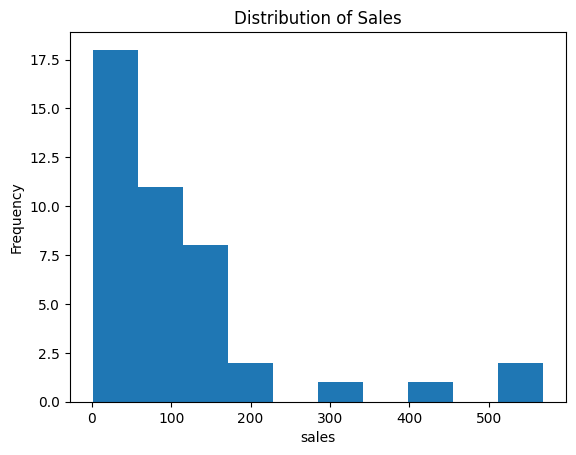

In [183]:
plt.hist(df1['sales'].dropna(), bins=10)
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

In [184]:
df1['creation_date'] = pd.to_datetime(df1['creation_date'])

In [185]:
df1 = df1.sort_values('creation_date')

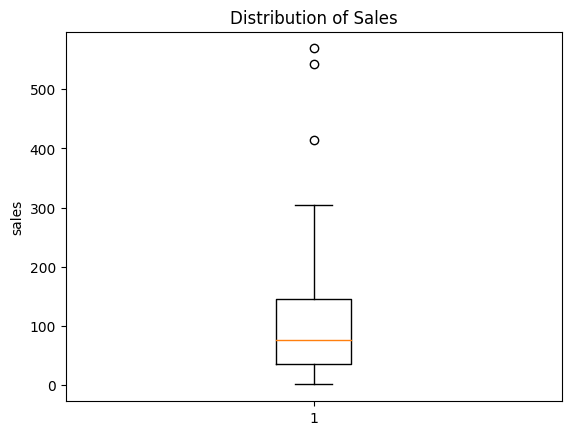

In [186]:
plt.boxplot(df1['sales'].dropna())
plt.ylabel('sales')
plt.title('Distribution of Sales')
plt.show()

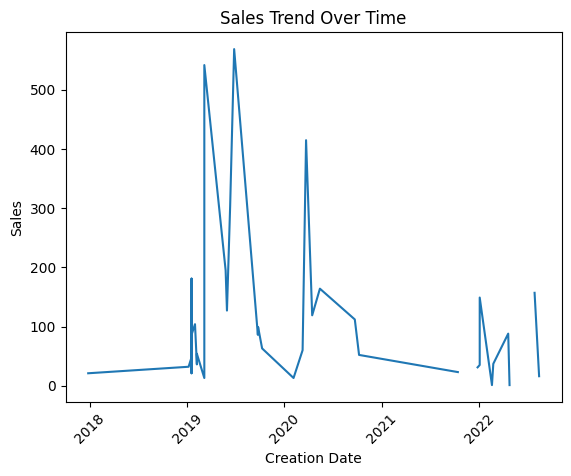

In [187]:

plt.plot(df1['creation_date'], df1['sales'])
plt.xlabel('Creation Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
plt.show()

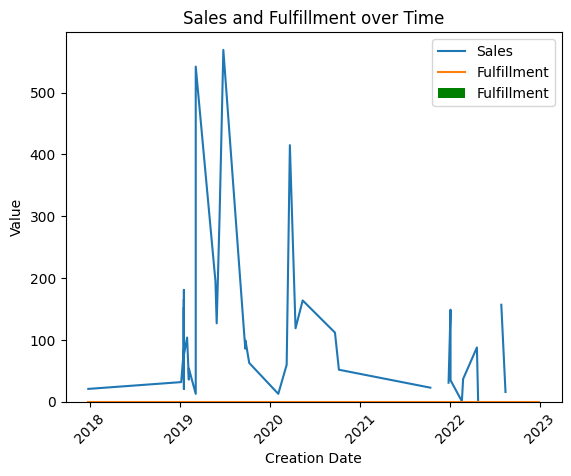

In [188]:

# Sort the dataframe by 'Creation_Date'
df1 = df1.sort_values('creation_date')

# Convert 'Fulfillment' column to numeric data type
df1['fulfillment'] = pd.to_numeric(df1['fulfillment'], errors='coerce')

# Create a line plot for 'Sales' over time
plt.plot(df1['creation_date'], df1['sales'], label='Sales')

# Create a line plot for 'Fulfillment' over time
plt.plot(df1['creation_date'], df1['fulfillment'].fillna(0), label='Fulfillment')

# Create a bar plot for 'Fulfillment'
plt.bar(df1['creation_date'], df1['fulfillment'].fillna(0), label='Fulfillment', color='green')

# Set labels and title
plt.xlabel('Creation Date')
plt.ylabel('Value')
plt.title('Sales and Fulfillment over Time')

# Add a legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

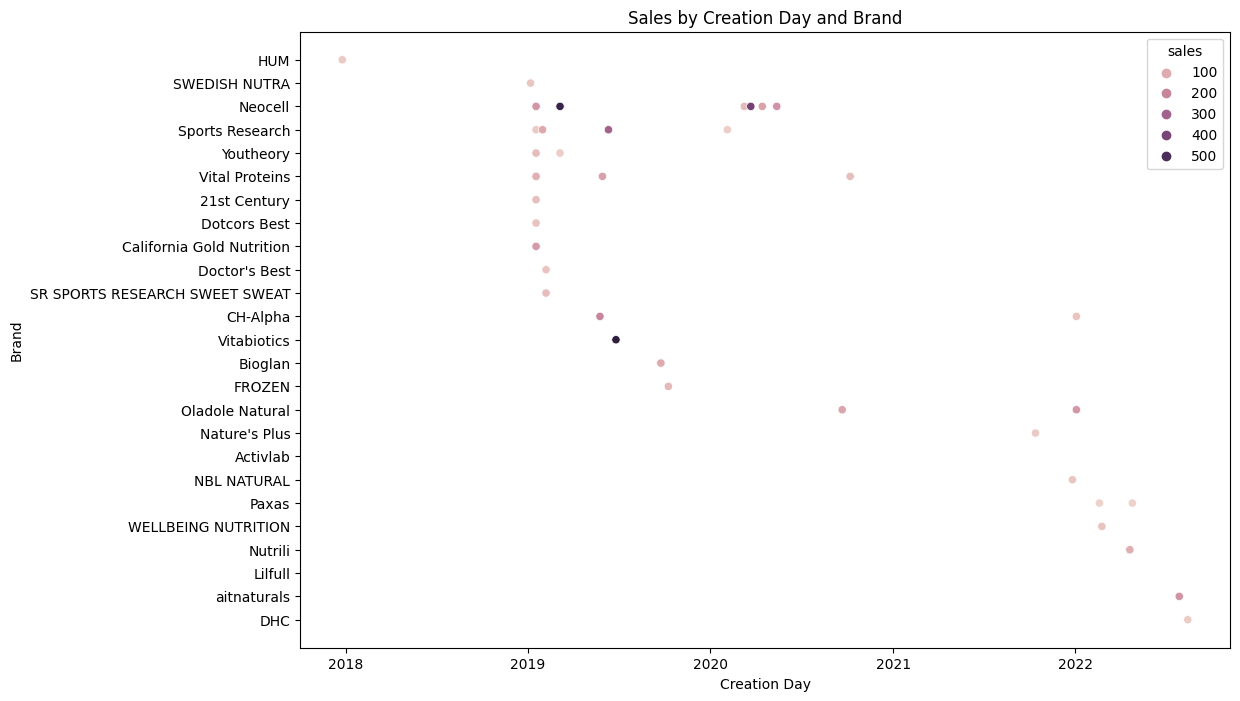

In [189]:
# Sort the dataframe by 'Creation_Date'
df1 = df1.sort_values('creation_date')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot with color encoding for sales
sns.scatterplot(x='creation_date', y='brand', hue='sales', data=df1)

# Set labels and title
plt.xlabel('Creation Day')
plt.ylabel('Brand')
plt.title('Sales by Creation Day and Brand')

# Show the plot
plt.show()

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sales', ylabel='brand'>

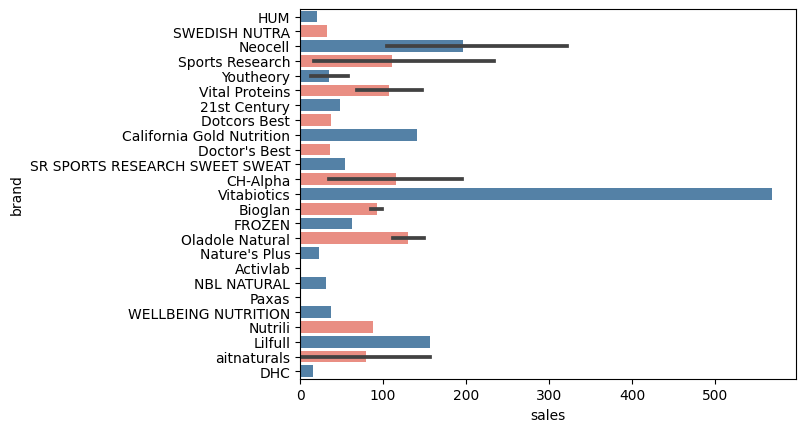

In [243]:
sns.barplot(x = "sales", y = "brand", data = df1, palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"], n_colors = 4))

<ipython-input-246-df89a5e794f5>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df1.groupby(['creation_date', 'brand']).sum().reset_index()


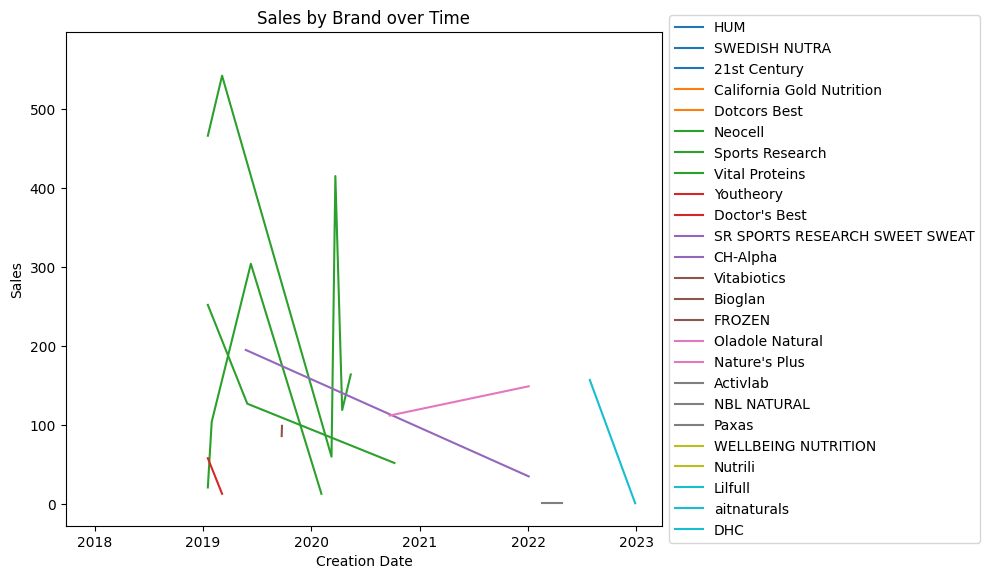

In [246]:
# Convert 'creation_date' column to datetime type
df1['creation_date'] = pd.to_datetime(df1['creation_date'])

# Group the data by 'creation_date' and 'brand', and calculate the total sales
grouped_data = df1.groupby(['creation_date', 'brand']).sum().reset_index()

# Line Graph
fig, ax = plt.subplots(figsize=(10, 6))

colors = plt.cm.tab10(np.linspace(0, 1, len(grouped_data['brand'].unique())))

for i, brand in enumerate(grouped_data['brand'].unique()):
    data = grouped_data[grouped_data['brand'] == brand]
    ax.plot(data['creation_date'], data['sales'], label=brand, color=colors[i])

ax.set_xlabel('Creation Date')
ax.set_ylabel('Sales')
ax.set_title('Sales by Brand over Time')

# Move the legend to the right side
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Ensures the legend doesn't overlap with the plot

plt.show()

In [190]:
df1.groupby(['size_tier'])['weight'].sum().sort_values(ascending = False).head(14)

size_tier
Standard Parcel      37.96
Large Envelope        1.27
Standard Envelope     0.22
Name: weight, dtype: float64

* In size_tier category we have 3 types of packaging: standard parcel with the weight of 51.83, large envelope 1.83, standard envelope 0.22. but units unknown

In [191]:
df1.groupby(['fulfillment']).sum()

<ipython-input-191-dce328a4d93c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(['fulfillment']).sum()


,price_aed,sales,revenue,bsr,fees_aed,active_sellers_#,ratings,review_count,images,review_velocity,weight
fulfillment,,,,,,,,,,,


*Мы видим из этой таблицы что максимально продано с 
*fullfilment 2673 AMZ и 2315FBA и 126MFN.* Reveue max max 364520 for FBA ad 21774 for MFN
* Fees mi for MFN is 224 ad max 1112.7 for FBA

### Check the data types of the columns for the dataset

In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 37 to 35
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_details   47 non-null     object        
 1   brand             47 non-null     object        
 2   price_aed         47 non-null     float64       
 3   sales             43 non-null     float64       
 4   revenue           43 non-null     float64       
 5   bsr               47 non-null     float64       
 6   fees_aed          47 non-null     float64       
 7   active_sellers_#  47 non-null     int64         
 8   ratings           47 non-null     float64       
 9   review_count      47 non-null     float64       
 10  images            47 non-null     int64         
 11  review_velocity   47 non-null     int64         
 12  buy_box           47 non-null     object        
 13  size_tier         47 non-null     object        
 14  fulfillment       0 non-nul

* bold text 11 numerical, and 6 categorical types and data is missing in the following columns: creation_date, fullfilment, sales and revenue


###Checking for duplicates

In [193]:
df1.duplicated().sum()

0

### Checking for missing values

In [194]:
print(df1.isnull().sum())

product_details      0
brand                0
price_aed            0
sales                4
revenue              4
bsr                  0
fees_aed             0
active_sellers_#     0
ratings              0
review_count         0
images               0
review_velocity      0
buy_box              0
size_tier            0
fulfillment         47
dimensions           0
weight               0
creation_date        0
dtype: int64


There is missing data in the following columns: sales ad revenue 4, which is not significat



In [195]:
mis_imp = [
    
    "sales",
    "revenue"
    
]
for m in mis_imp:
    df1[m] = df1[m].fillna(value=df1.groupby(["ratings"])[m].transform("median"))
# checking for missing values
df1.isnull().sum()

product_details      0
brand                0
price_aed            0
sales                0
revenue              0
bsr                  0
fees_aed             0
active_sellers_#     0
ratings              0
review_count         0
images               0
review_velocity      0
buy_box              0
size_tier            0
fulfillment         47
dimensions           0
weight               0
creation_date        0
dtype: int64

* Пропущенные данные исправлены

### Нас интересует группа продуктов содержащих bio marine. Разделим наши продукты на 2 группы

In [196]:
# Create a new column indicating whether the product contains "marine"
df1['Group'] = df1['product_details'].str.contains('marine', case=False)

# Group the products based on the "Group" column
grouped_df = df1.groupby('Group')

# Access the separate groups
marine_group = grouped_df.get_group(True)
other_group = grouped_df.get_group(False)

# Print the separate groups
print("\nMarine Group:")
print(marine_group['product_details'])

print("\nOther Group:")
print(other_group['product_details'])


Marine Group:
25    Vital Proteins, Marine Collagen, Wild Caught, ...
15    Bioglan Collagen Tablets | 2500mg | Hydrolysed...
24    Bioglan Collagen Effervescent | 1000mg | Hydro...
13         Neocell Neocell Marine Collagen 120 Capsules
17    Oladole Natural Super Collagen C Marine Collag...
22    Oladole Natural, Collagen Peptides Powder 201g...
53    ($) Collagen Beauty Hair | 200g jar | Rebuildi...
29    Wellbeing Nutrition Pure Korean Marine Collage...
0     ($) Nutrili Marine Collagen Shots (20) | Hair,...
14    Nutrili Marine Collagen Shots (20) | Hair, Ski...
54    ($) Collagen Beauty Shots I 960ml I 12 Shots I...
Name: product_details, dtype: object

Other Group:
37    HUM Collagen Love - Support Firm Skin & Elasti...
32    SWEDISH NUTRA Collagen Pure Liquid Peptide (Fi...
45          Neocell Super Collagen PlUS C - 120 Tablets
16    Neocell Collagen C Pomegranate Liquid, 16 Fl O...
33    Sports Research Collagen Peptides (Pack of 20,...
38    Youtheory, Collagen Advanced For

In [197]:
# df1['Group'] = df1['product_details'].str.contains('marine', case=False)
marine_group.value_counts().sum()

0

In [198]:
marine_group.groupby('fulfillment',as_index=False).agg({'sales':'count'}).sort_values('sales', ascending=False).head(5)

,fulfillment,sales


In [199]:
marine_group.groupby('fulfillment',as_index=False).agg({'revenue':'count'}).sort_values('revenue', ascending=False).head(5)

,fulfillment,revenue


In [200]:
reven = marine_group.groupby('revenue',as_index=False)
reven_counts = reven.count()
print(reven_counts)
for group, group_data in reven:
    print("Group:", group)
    print(group_data)

    revenue  product_details  brand  price_aed  sales  bsr  fees_aed  \
0    231.00                1      1          1      1    1         1   
1    231.32                1      1          1      1    1         1   
2   2970.00                1      1          1      1    1         1   
3   4662.00                1      1          1      1    1         1   
4   5160.00                1      1          1      1    1         1   
5   7274.40                1      1          1      1    1         1   
6   9528.55                1      1          1      1    1         1   
7  11483.50                1      1          1      1    1         1   
8  15394.00                1      1          1      1    1         1   
9  25960.00                2      2          2      2    2         2   

   active_sellers_#  ratings  review_count  images  review_velocity  buy_box  \
0                 1        1             1       1                1        1   
1                 1        1             1     

In [201]:
##Все подгруппы
## Grouping by "Product Details" column
# grouped = df1.groupby('product_details')

# Printing the groups


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [202]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [203]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [204]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [205]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Statistical summary of the data

In [206]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price_aed,47.0,140.151702,74.091816,26.99,84.910,123.00,183.495,295.00
sales,47.0,109.468085,124.619569,1.00,33.500,76.00,151.000,569.00
revenue,47.0,15005.865532,19052.143486,231.00,2922.900,8046.00,17219.000,95239.22
bsr,47.0,5990.042553,9726.335375,200.00,931.500,3047.00,6820.500,57439.00
fees_aed,47.0,29.101915,11.316122,8.66,20.735,26.90,35.320,52.75
active_sellers_#,47.0,4.148936,2.985317,1.00,2.000,3.00,6.500,11.00
ratings,47.0,4.478723,0.285852,3.40,4.350,4.50,4.600,5.00
review_count,47.0,7651.042553,22808.677727,1.00,36.000,270.00,2490.000,95283.00
images,47.0,6.936170,3.522624,1.00,3.500,7.00,9.000,16.00
review_velocity,47.0,37.000000,89.840922,-87.00,2.500,8.00,24.000,497.00


* From Statistical Summary we ca see mi ad max

In [207]:
#Observation on products
df1['product_details'].nunique()

47

In [208]:
#df1.groupby('fulfillment',as_index=False).agg({'creation_date':'count'}).sort_values('creation_date', ascending=False).head(5)
ful = df1.groupby(['fulfillment'])['creation_date'].value_counts().sort_values(ascending=False).head(3)
ful

Series([], Name: creation_date, dtype: int64)

In [209]:
min_date = df1["creation_date"].min()
max_date = df1["creation_date"].max()
print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

Minimum Date: 2017-12-25 00:00:00
Maximum Date: 2022-12-28 00:00:00


In [210]:
min_date = df1["creation_date"].min()
max_date = df1["sales"].max()
print("Maximum Date:", max_date)

Maximum Date: 569.0


CREATION  date vs sales

In [211]:
cre = df1.groupby(['creation_date'])['sales'].value_counts().sort_values(ascending=False).head(50)
cre

creation_date  sales
2022-06-29     157.0    2
2022-04-20     88.0     2
2017-12-25     21.0     1
2021-11-13     1.0      1
2020-02-04     13.0     1
2020-03-09     60.0     1
2020-03-22     415.0    1
2020-04-14     119.0    1
2020-05-13     164.0    1
2020-09-21     112.0    1
2020-10-07     52.0     1
2021-10-13     23.0     1
2021-12-26     31.0     1
2019-09-24     99.0     1
2022-01-03     35.0     1
               149.0    1
2022-02-18     1.0      1
2022-02-23     37.0     1
2022-04-25     1.0      1
2022-07-28     157.0    1
2022-08-14     16.0     1
2019-10-09     63.0     1
2019-09-23     86.0     1
2019-01-06     32.0     1
2019-06-26     569.0    1
2019-01-17     21.0     1
               37.0     1
               48.0     1
               56.0     1
               58.0     1
               76.0     1
               86.0     1
               141.0    1
               153.0    1
               166.0    1
               181.0    1
2019-01-30     104.0    1
2019-02-06     36

In [212]:
ro = df1.groupby(['creation_date'])['product_details'].value_counts().sort_values(ascending=False).head(3)
ro

creation_date  product_details                                                                                                                                                   
2017-12-25     HUM Collagen Love - Support Firm Skin & Elasticity - Reduce Signs of Ageing - Premium Collagen, Vitamin C and a Powerful Antioxidant - 90 Capsules - 30 Day Supply    1
2022-01-03     CH-Alpha Sport Health Collagen (30 x 25ml)                                                                                                                            1
2020-03-09     Neocell Neocell Super Collagen + C - 360 Ct.                                                                                                                          1
Name: product_details, dtype: int64

In [213]:
#Observation on products
df1['price_aed'].nunique()

38

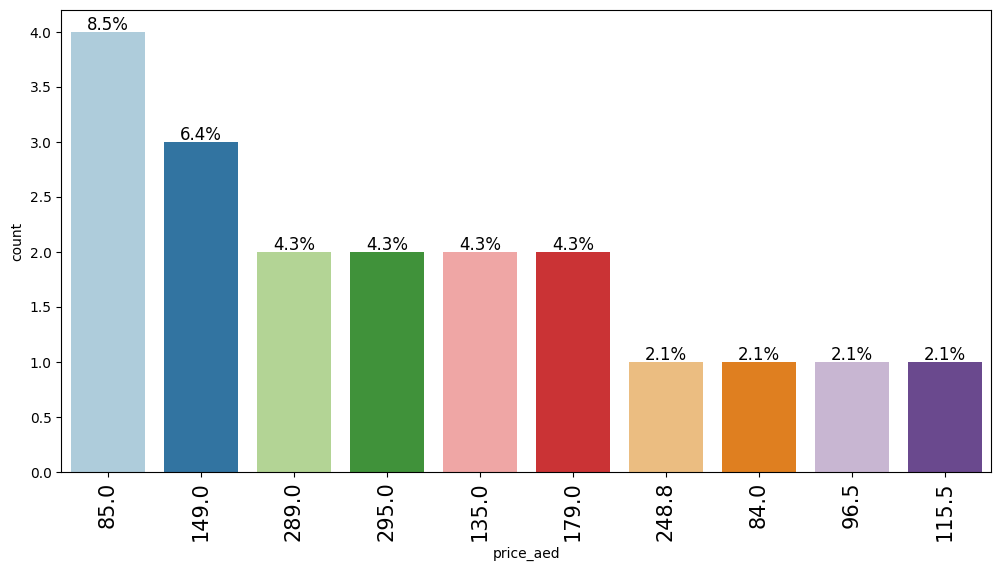

In [214]:
labeled_barplot(df1, "price_aed", perc=True, n=10)

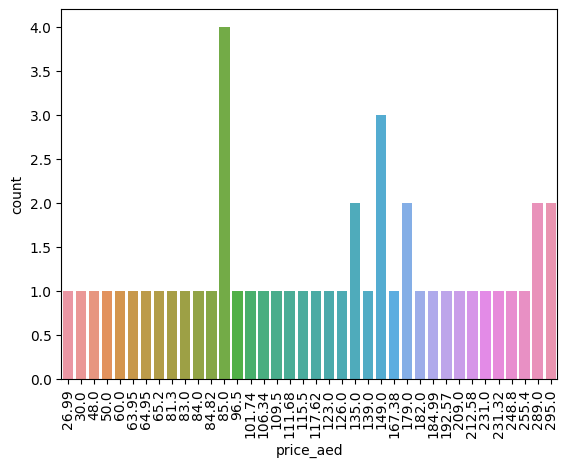

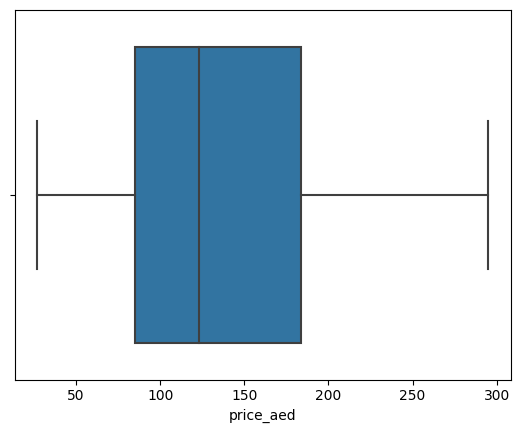

In [215]:
sns.countplot(data=df1, x='price_aed')
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df1, x='price_aed')
plt.show()

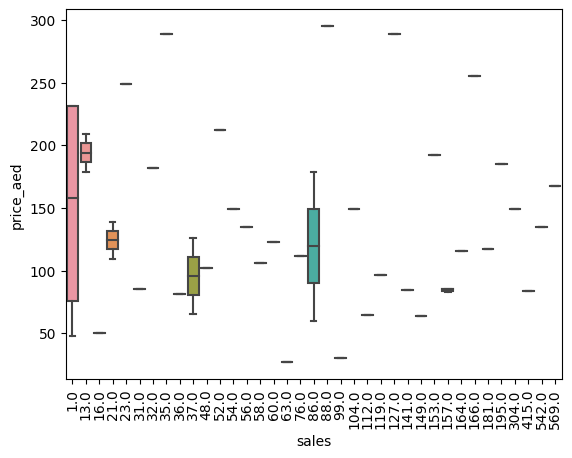

In [216]:
#sns.countplot(data=df1, x='sales')
#plt.xticks(rotation=90);
#plt.figure(figsize=(15, 5))
# sns.boxplot(data=df, x="ram", y="brand_name")
sns.boxplot(data=df1, x="sales", y="price_aed")
plt.xticks(rotation=90)
plt.show()

Top 5 products in terms of sales

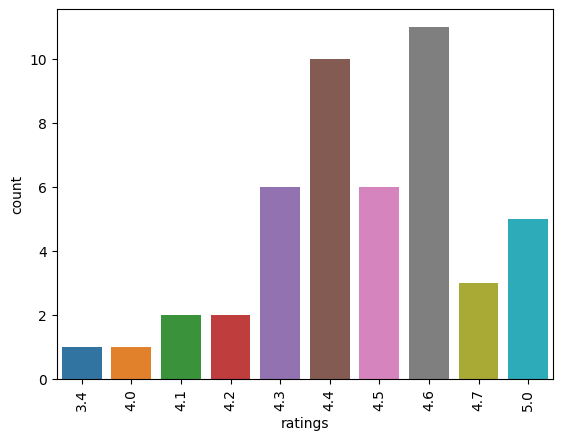

In [217]:
sns.countplot(data=df1, x='ratings')
plt.xticks(rotation=90)
plt.show()

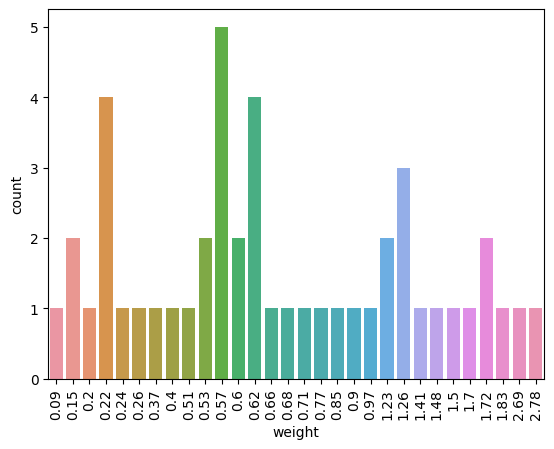

In [218]:
sns.countplot(data=df1, x='weight')
plt.xticks(rotation=90)
plt.show()

<Figure size 1500x1000 with 0 Axes>

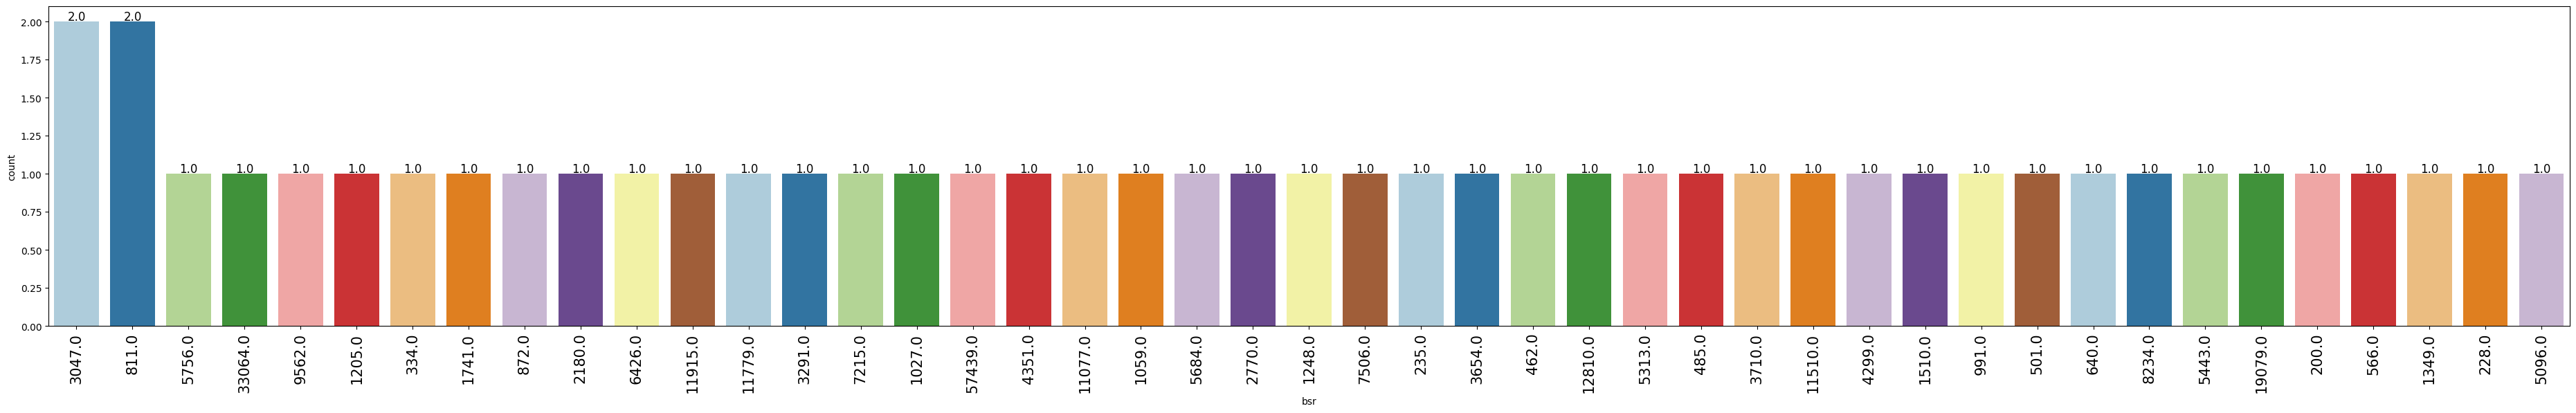

In [219]:
plt.figure(figsize=(15, 10))
labeled_barplot(df1, "bsr", "sales")

**Sales**

<Figure size 1500x1000 with 0 Axes>

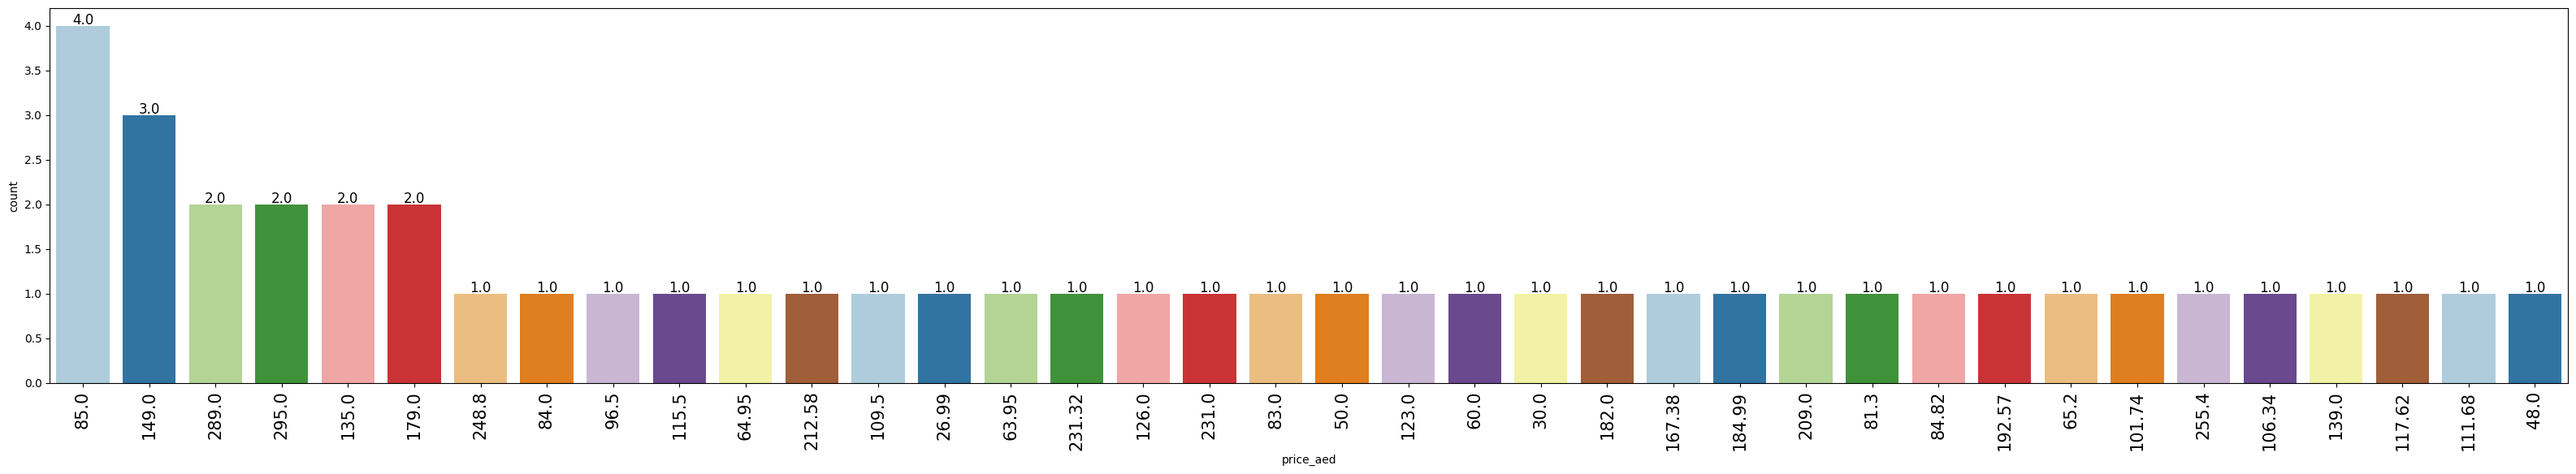

In [220]:
plt.figure(figsize=(15, 10))
labeled_barplot(df1, "price_aed", "sales")

In [221]:
# labeled_barplot(df, "product_details", perc=True, n=10)

<Figure size 1500x1000 with 0 Axes>

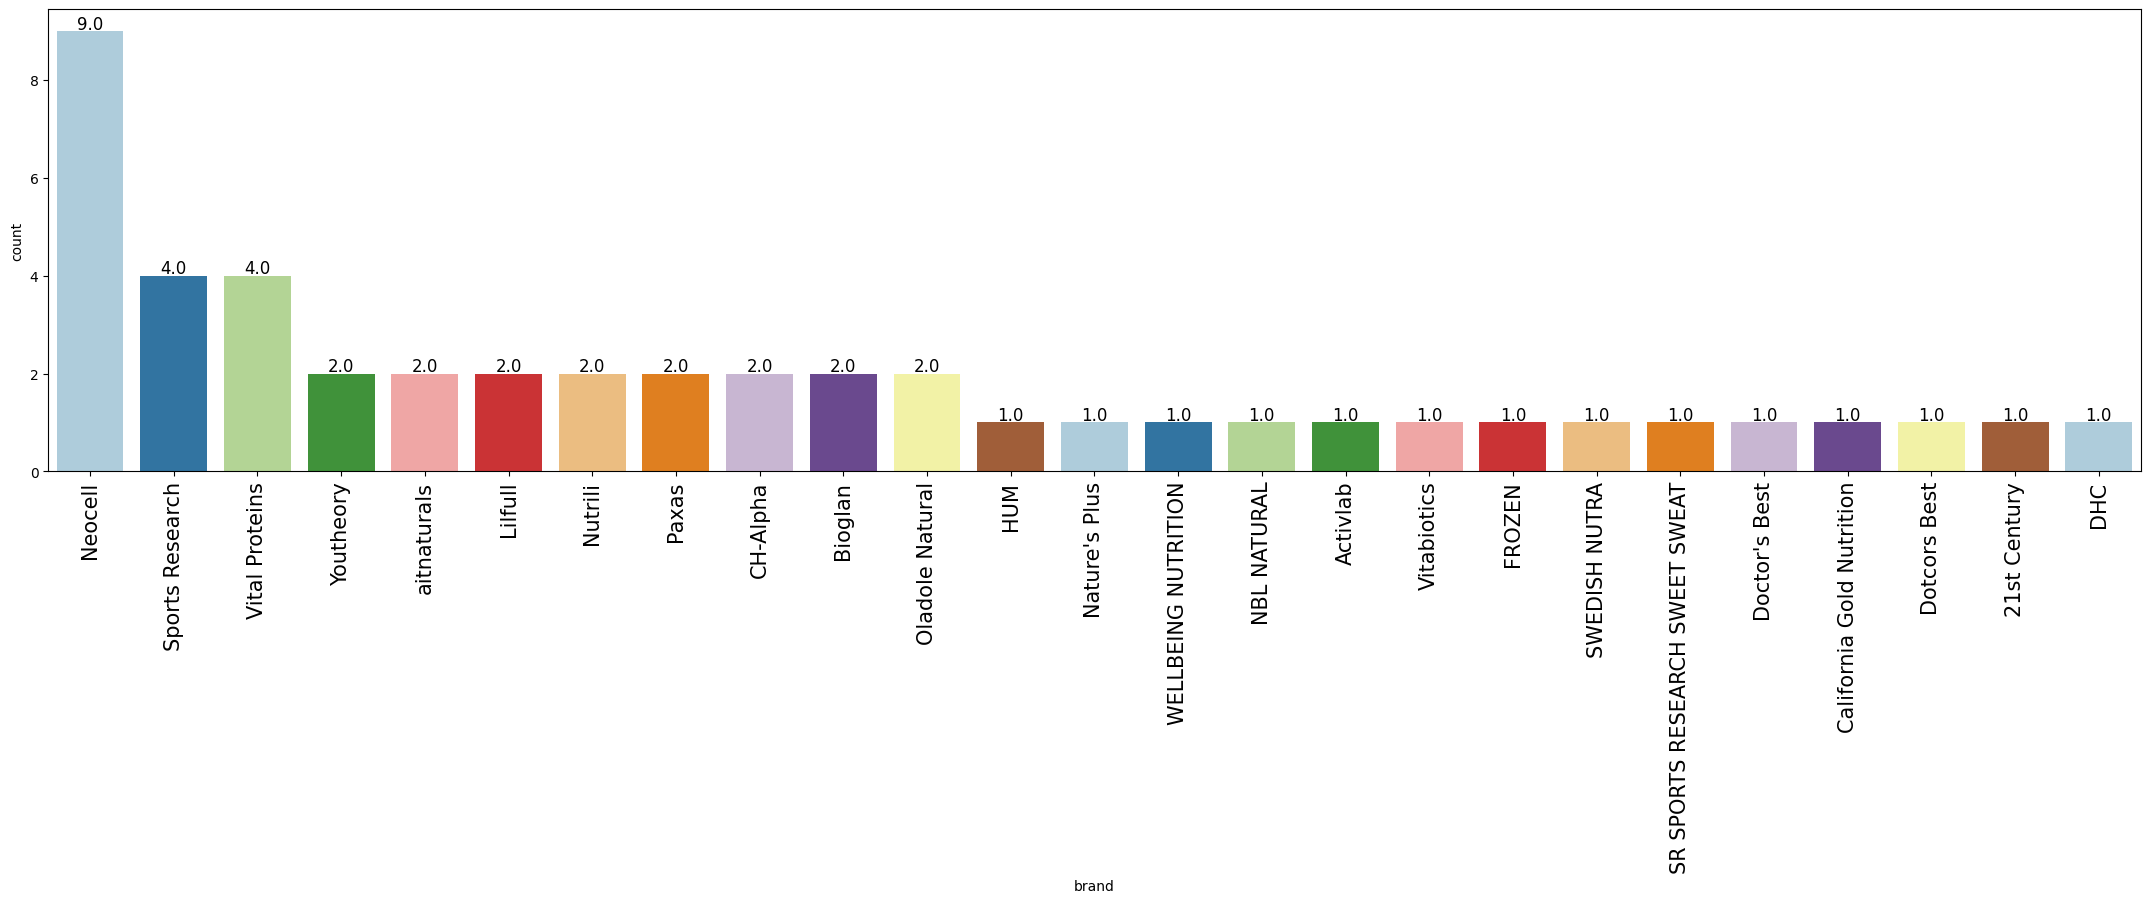

In [222]:
plt.figure(figsize=(15, 10))
labeled_barplot(df1, "brand", "sales")

In [223]:
df1["brand"].count()


47

<Figure size 1500x1000 with 0 Axes>

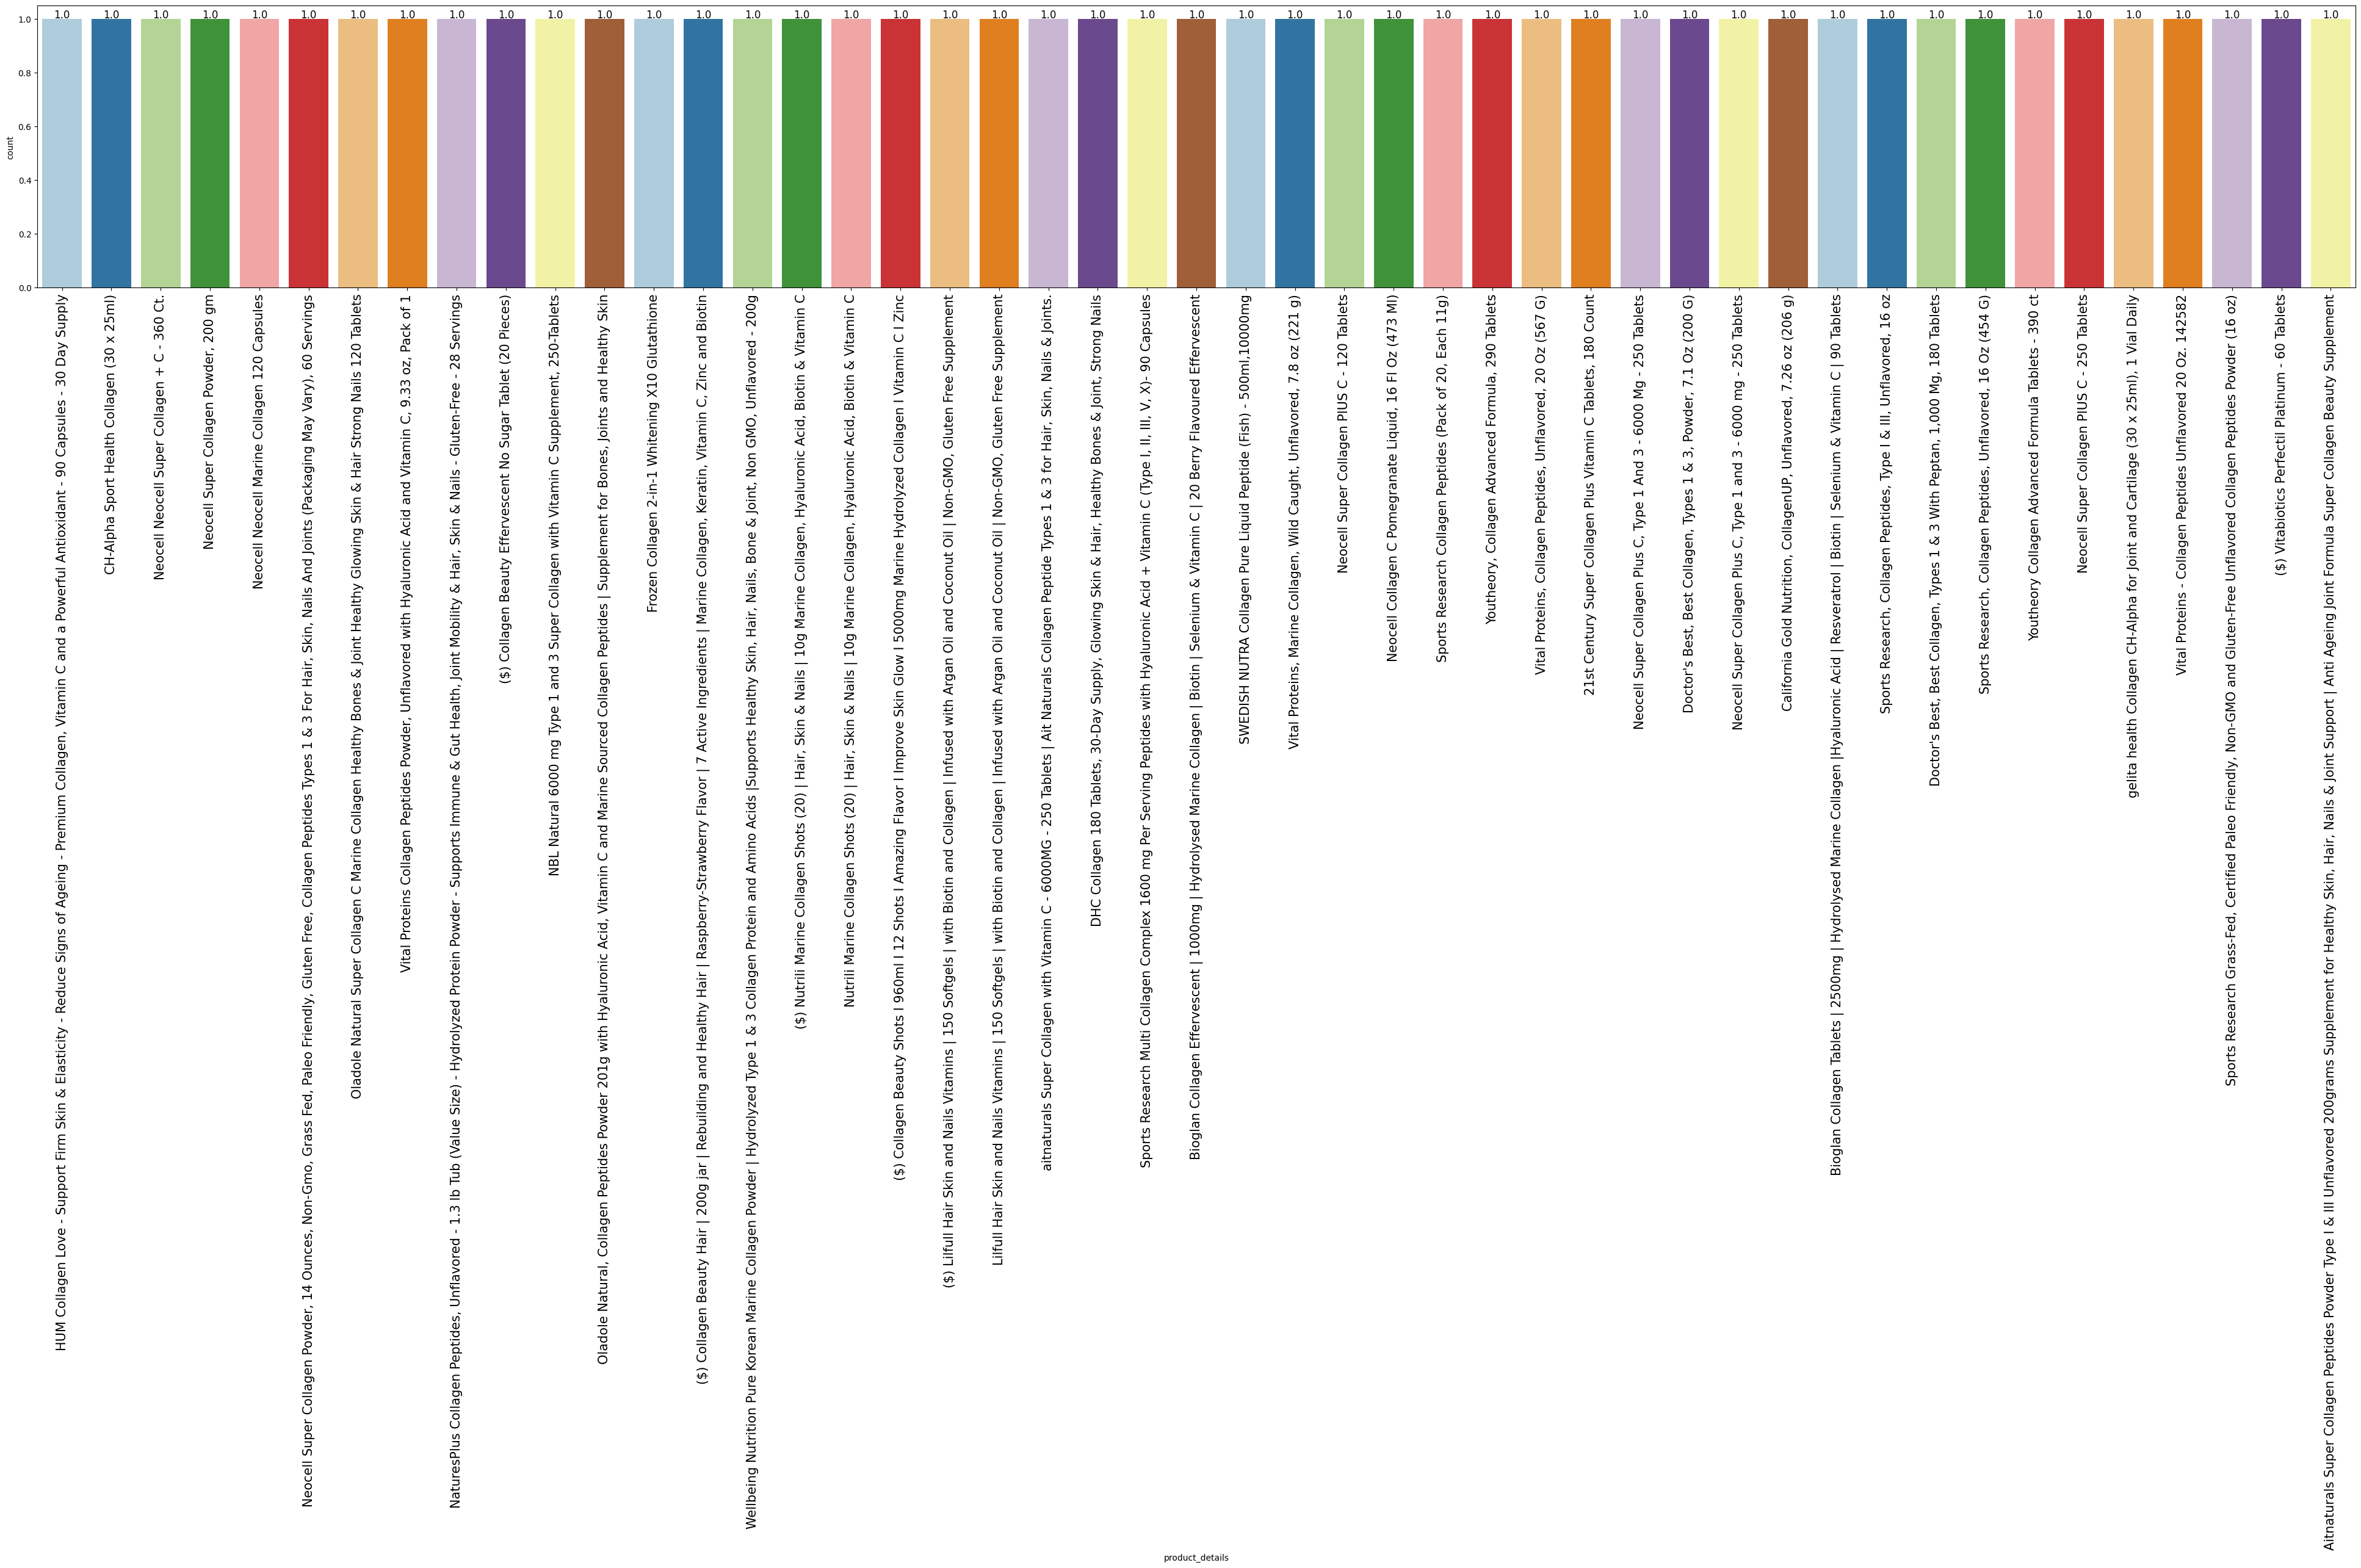

In [224]:
plt.figure(figsize=(15, 10))
labeled_barplot(df1, "product_details", "sales")

In [225]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
num_cols

['price_aed',
 'sales',
 'revenue',
 'bsr',
 'fees_aed',
 'active_sellers_#',
 'ratings',
 'review_count',
 'images',
 'review_velocity',
 'fulfillment',
 'weight']

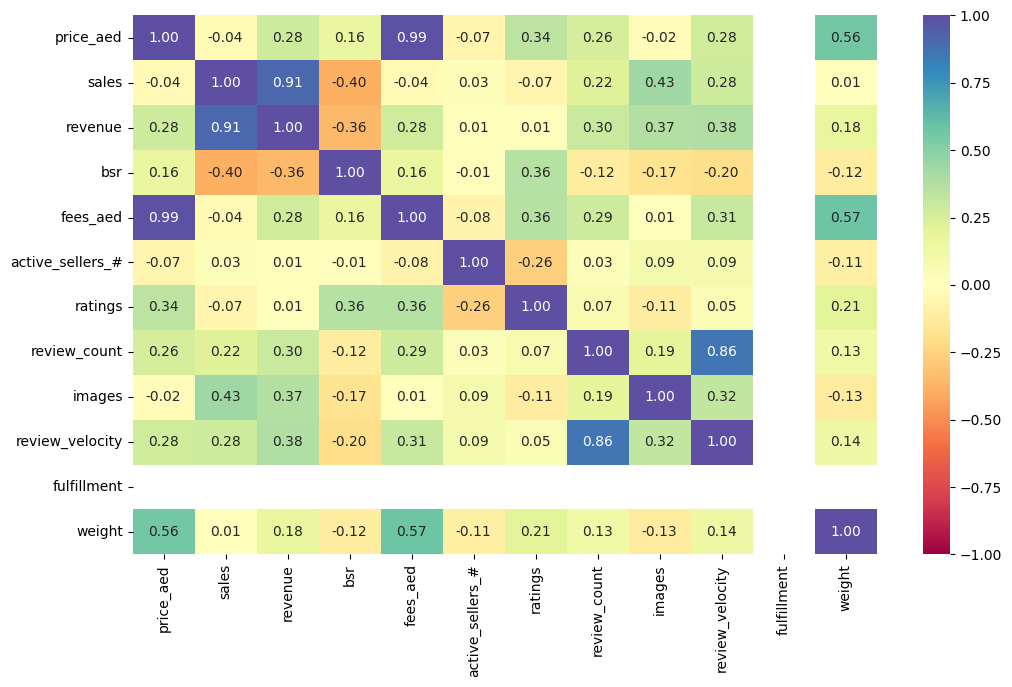

In [226]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [227]:
df1['brand'].nunique()

25

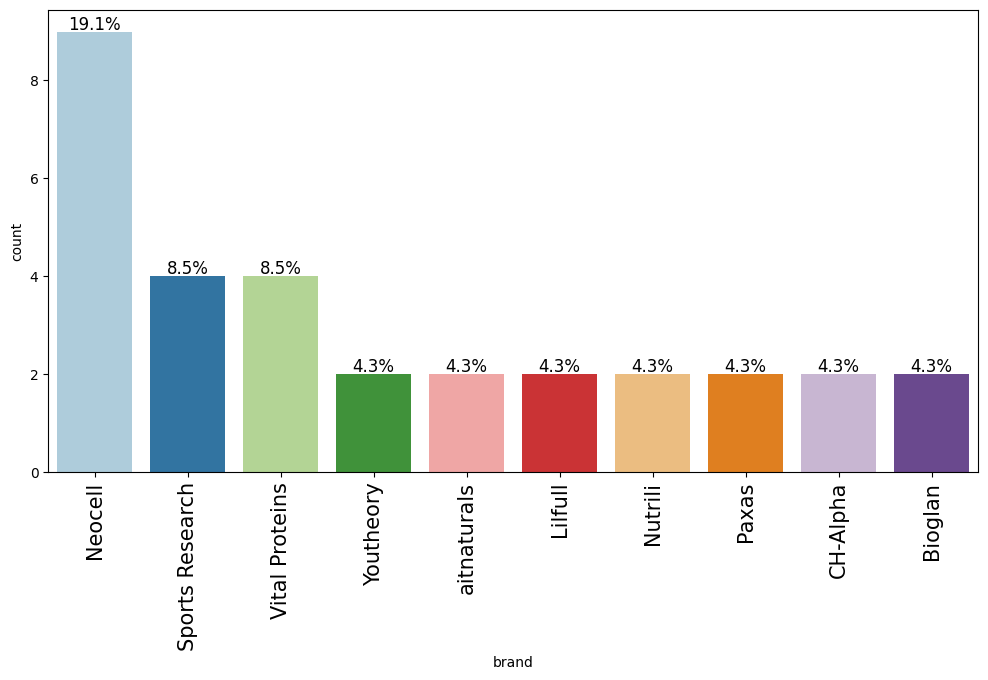

In [228]:
labeled_barplot(df1, "brand", perc=True, n=10)



In [229]:
df1['product_details'].nunique()

47

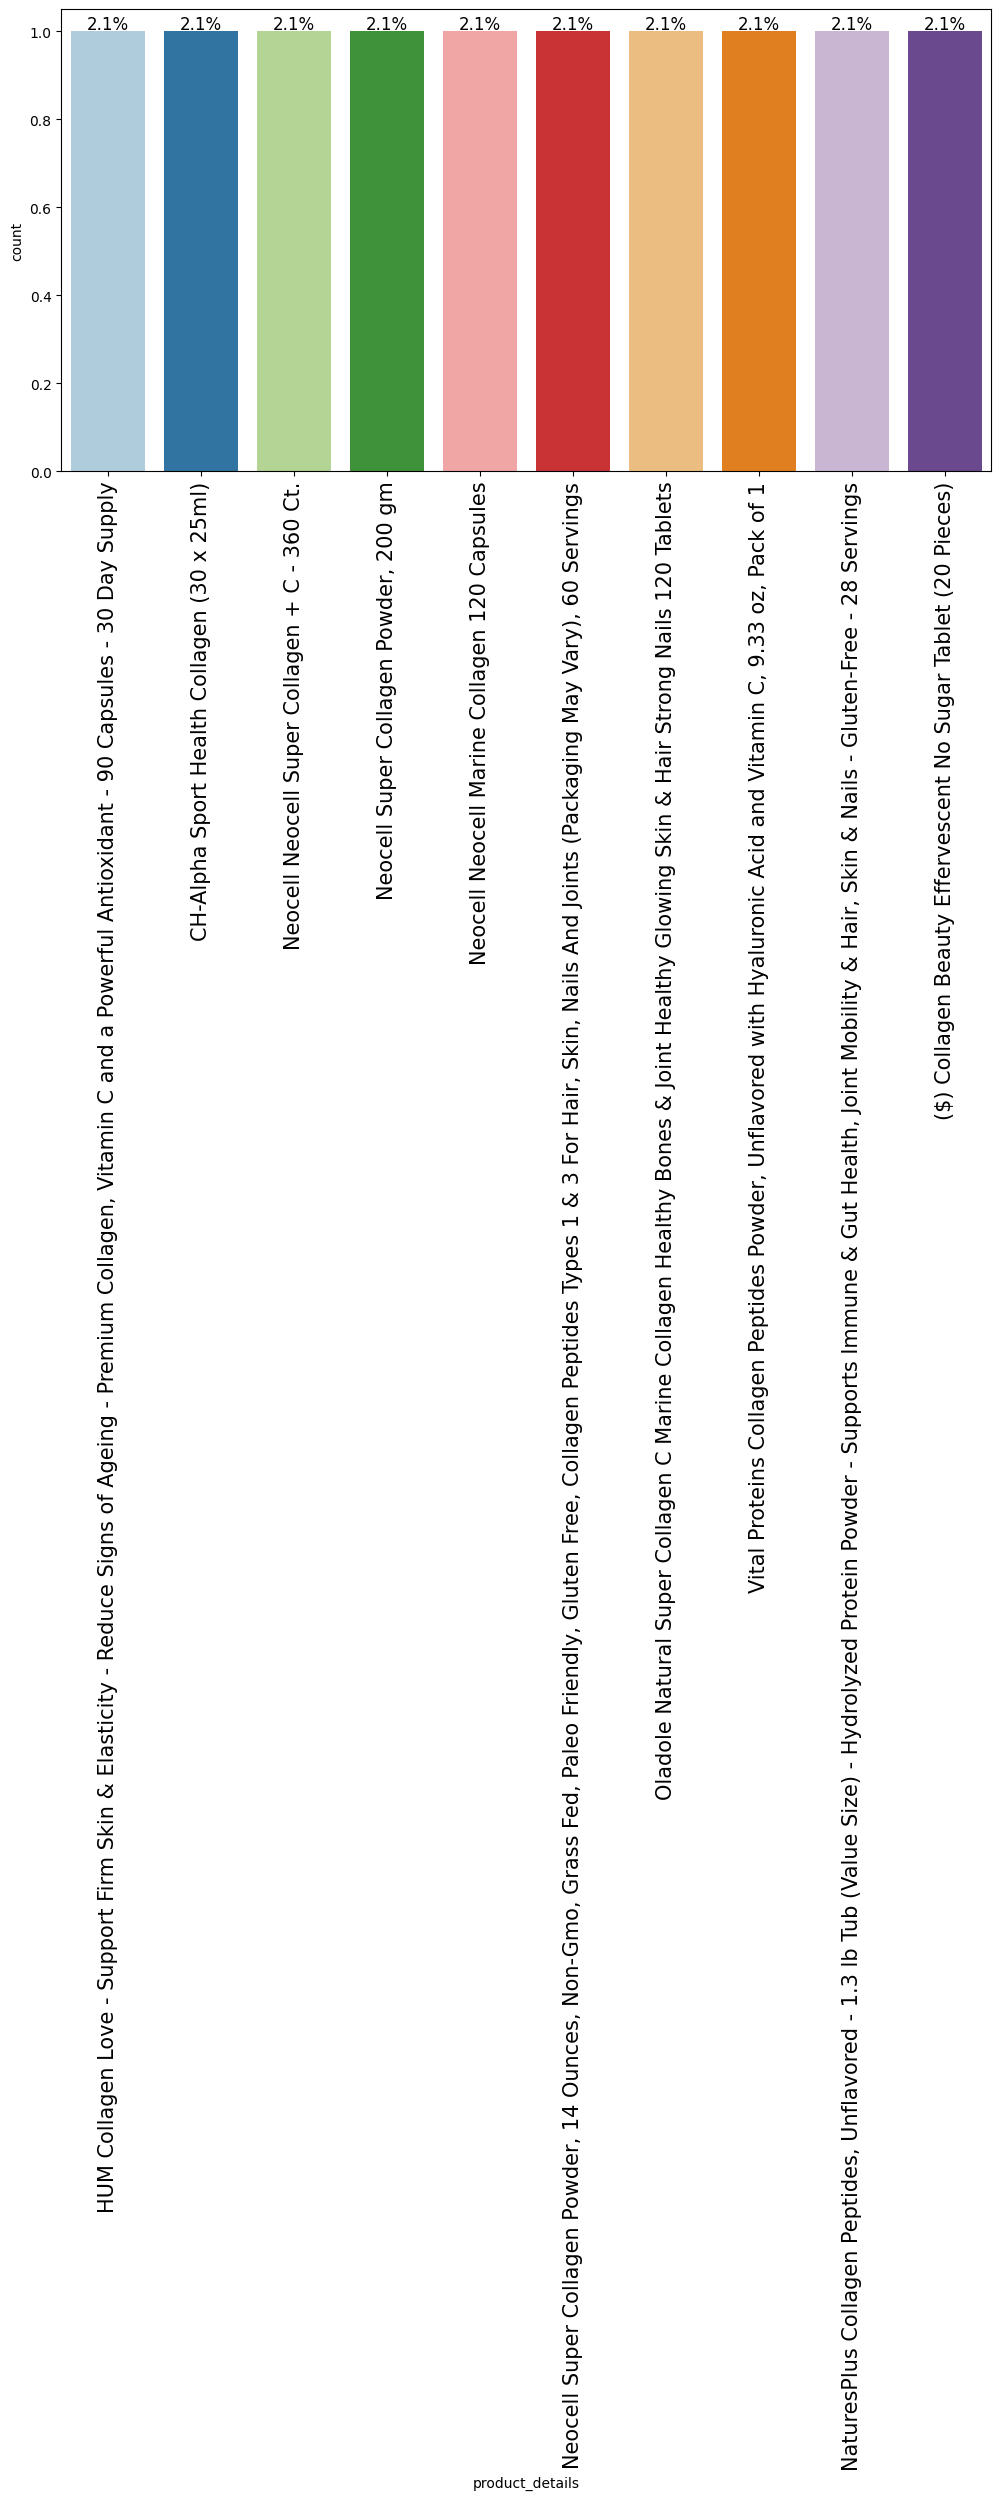

In [230]:
labeled_barplot(df1, "product_details", perc=True, n=10)